# Task-1:- SMS classifier


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df=df.drop_duplicates()

In [11]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

/tmp/ipykernel_4086/519336314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)


In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.columns=['Category','Message']

In [14]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   Message   5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [16]:
df['Category'].value_counts()

Category
ham     4516
spam     653
Name: count, dtype: int64

In [17]:
df['Message'].value_counts()

Message
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                               1
Wake me up at  &lt;#&gt;  am morning:)                                                                                                                        1
I will reach ur home in  &lt;#&gt;  minutes                                                                                                                   1
Wait.i will come out.. &lt;#&gt;  min:)                                                                                                                       1
R u here yet? I'm wearing blue shirt n black pants.                                                                                                           1
                                                                                                                                                             ..
;-( oh well, c u later          

In [18]:
df['Message'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [19]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

<Axes: xlabel='Category'>

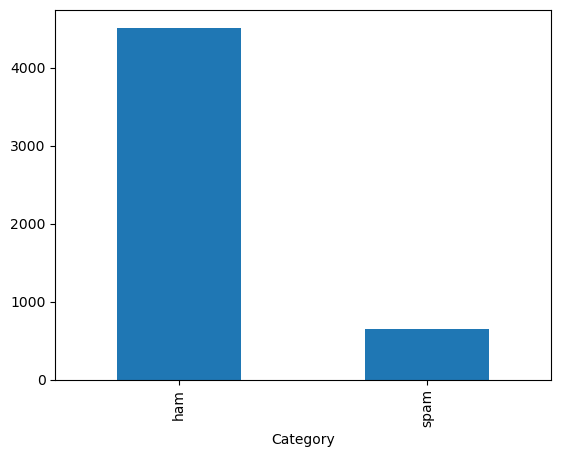

In [20]:
df['Category'].value_counts().plot(kind='bar')

In [21]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0) # 1->spam and 0->not spam

/tmp/ipykernel_4086/1714409692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0) # 1->spam and 0->not spam


In [22]:
df.columns

Index(['Category', 'Message', 'spam'], dtype='object')

In [23]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


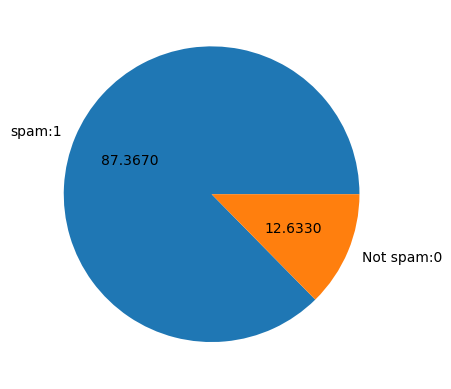

In [24]:
plt.pie(df['Category'].value_counts(),labels=['spam:1','Not spam:0'],autopct='%0.4f')
plt.show()

In [25]:
!pip install nltk

In [26]:
#NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP
#(Natural language processing)
import nltk

In [27]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/vivek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vivek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
df.drop(["Category"],axis=1,inplace=True)

/tmp/ipykernel_4086/2154389535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Category"],axis=1,inplace=True)


In [29]:
#for a number of characters
df.loc[:,'num_characters']=df['Message'].apply(len)

/tmp/ipykernel_4086/33077165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'num_characters']=df['Message'].apply(len)


In [30]:
df.head()

,Message,spam,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [31]:
#for number of words
from nltk.tokenize import word_tokenize
df['Message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5169, dtype: object

In [32]:
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

/tmp/ipykernel_4086/2093329903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [33]:
df.head(10)

,Message,spam,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15
5,FreeMsg Hey there darling it's been 3 week's n...,1,148,39
6,Even my brother is not like to speak with me. ...,0,77,18
7,As per your request 'Melle Melle (Oru Minnamin...,0,160,31
8,WINNER!! As a valued network customer you have...,1,158,32
9,Had your mobile 11 months or more? U R entitle...,1,154,31


In [34]:
#for number of sentences
df['num_sen']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

/tmp/ipykernel_4086/532613306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sen']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [35]:
df.head()

,Message,spam,num_characters,num_words,num_sen
0,"Go until jurong point, crazy.. Available only ...",0,111,24,24
1,Ok lar... Joking wif u oni...,0,29,8,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,37
3,U dun say so early hor... U c already then say...,0,49,13,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,15


In [36]:
print(df.columns)

Index(['Message', 'spam', 'num_characters', 'num_words', 'num_sen'], dtype='object')


In [37]:
#ham
df[df['spam']==0][['num_characters','num_words','num_sen']].describe()

,num_characters,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,17.123782
std,56.358207,13.493970,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [38]:
#spam
df[df['spam']==1][['num_characters','num_words','num_sen']].describe()

,num_characters,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


array([[<Axes: title={'center': 'spam'}>,
        <Axes: title={'center': 'num_characters'}>],
       [<Axes: title={'center': 'num_words'}>,
        <Axes: title={'center': 'num_sen'}>]], dtype=object)

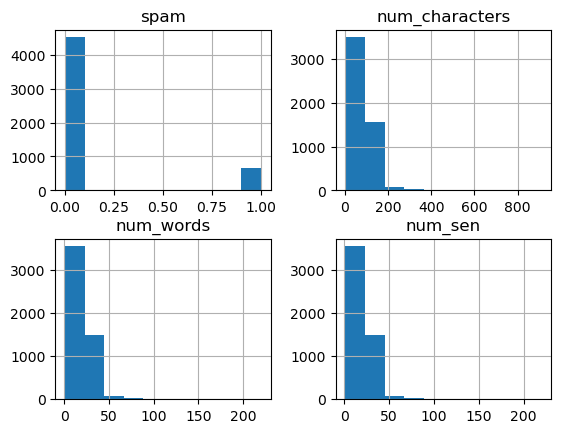

In [39]:
df.hist()

<Axes: xlabel='num_characters', ylabel='Count'>

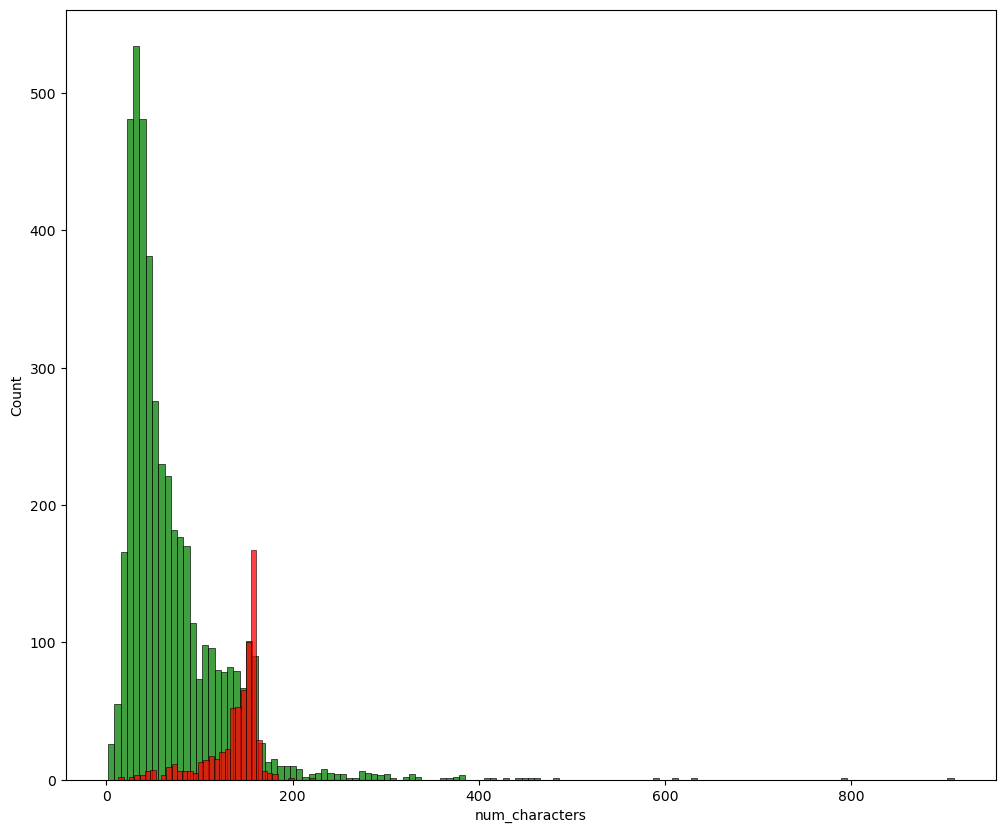

In [40]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['spam']==0]['num_characters'],color='green')
sns.histplot(df[df['spam']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

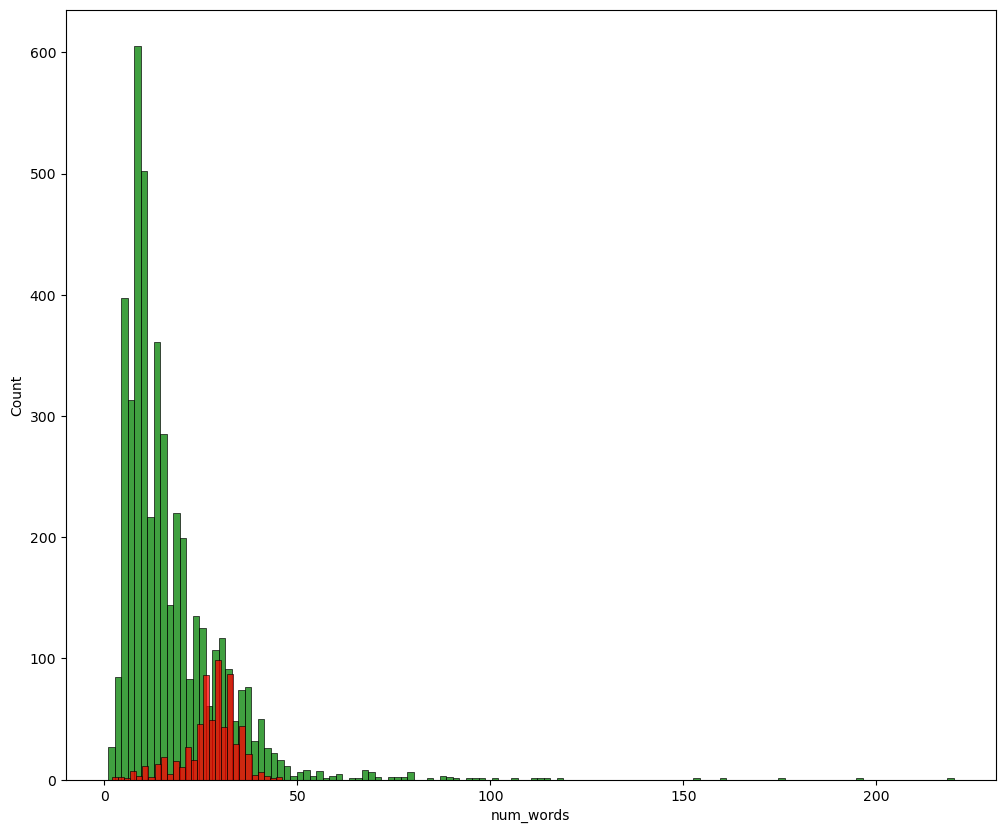

In [41]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['spam']==0]['num_words'],color='green')
sns.histplot(df[df['spam']==1]['num_words'],color='red')

In [42]:
cn=df[['spam','num_characters','num_words','num_sen']].corr()

In [43]:
cn

,spam,num_characters,num_words,num_sen
spam,1.000000,0.384717,0.262912,0.262912
num_characters,0.384717,1.000000,0.965760,0.965760
num_words,0.262912,0.965760,1.000000,1.000000
num_sen,0.262912,0.965760,1.000000,1.000000


<Axes: >

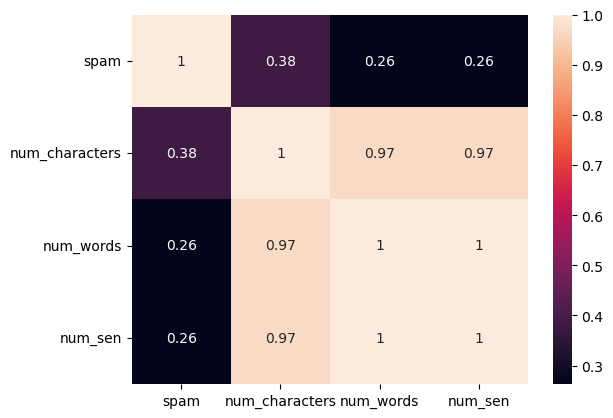

In [44]:
sns.heatmap(cn,annot=True)

In [45]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/vivek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
#Generally, the most common words used in a text are “the”, “is”, “in”,
#“for”, “where”, “when”, “to”, “at” etc.
stopwords.words('english')
len(stopwords.words('english'))

179

In [47]:
import string
result=string.punctuation

In [48]:
print(result)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [49]:
def text_transform(text):
    
    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    return ''.join([stemmer.stem(word) for word in text.split()])

In [50]:
# Define the text_transform function
def text_transform(text):
    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in text.split()])

In [51]:
df['transformed message']=df['Message'].apply(text_transform)

/tmp/ipykernel_4086/1656723363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed message']=df['Message'].apply(text_transform)


In [52]:
df.head()

,Message,spam,num_characters,num_words,num_sen,transformed message
0,"Go until jurong point, crazy.. Available only ...",0,111,24,24,"go until jurong point, crazy.. avail onli in b..."
1,Ok lar... Joking wif u oni...,0,29,8,8,ok lar... joke wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,37,free entri in 2 a wkli comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,0,49,13,13,u dun say so earli hor... u c alreadi then say...
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,15,"nah i don't think he goe to usf, he live aroun..."


In [53]:
!pip install wordcloud

In [54]:
from wordcloud import WordCloud

In [55]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [56]:
spam_wc=wc.generate(df[df['spam']==1]['transformed message'].str.cat(sep=" "))

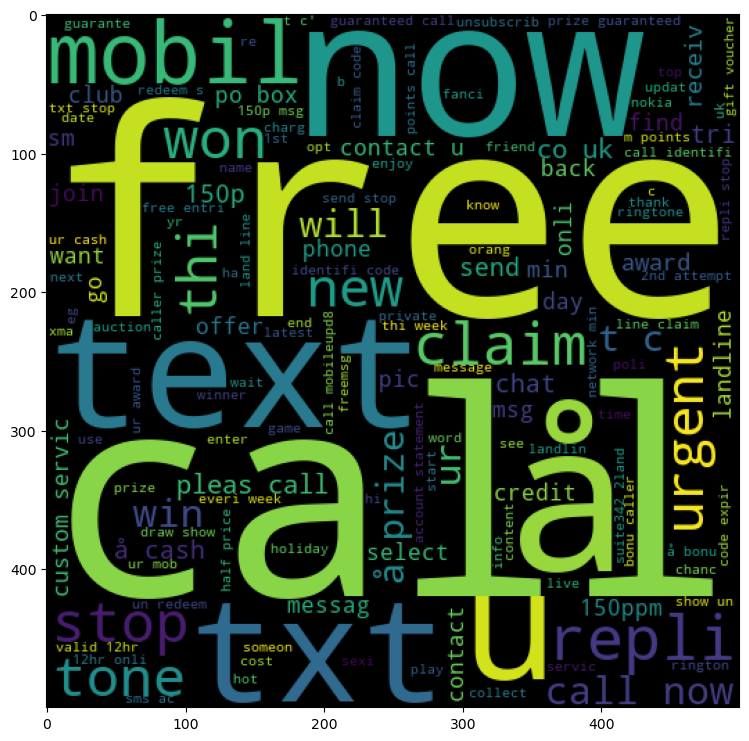

In [57]:
plt.figure(figsize=(12,9))
plt.imshow(spam_wc)
plt.show()

In [58]:
ham_wc=wc.generate(df[df['spam']==0]['transformed message'].str.cat(sep=" "))

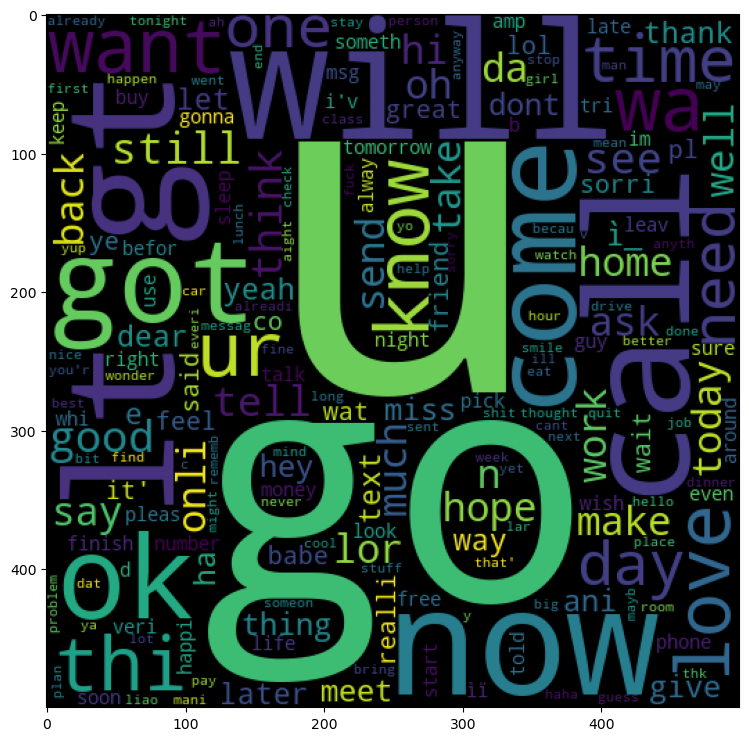

In [59]:
plt.figure(figsize=(12,9))
plt.imshow(ham_wc)
plt.show()

In [60]:
spam_corpus=[]
for message in df[df['spam']==1]['transformed message'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [61]:
len(spam_corpus)

15464

In [62]:
from collections import Counter

In [63]:
data=pd.DataFrame(Counter(spam_corpus).most_common(30))
data.rename(columns={0:'Word',1:'frequency'},inplace=True)

In [64]:
data

,Word,frequency
0,to,591
1,a,328
2,call,310
3,your,247
4,you,226
5,for,182
6,the,181
7,free,157
8,or,157
9,2,151


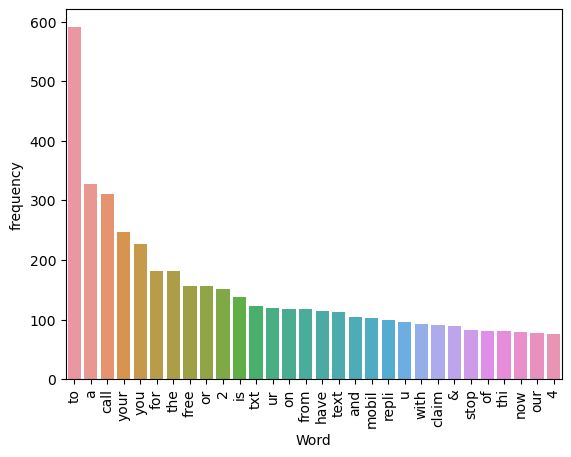

In [65]:
sns.barplot(x=data['Word'],y=data['frequency'])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
#Model Building
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [68]:
df['transformed message'].values

array(['go until jurong point, crazy.. avail onli in bugi n great world la e buffet... cine there got amor wat...',
       'ok lar... joke wif u oni...',
       "free entri in 2 a wkli comp to win fa cup final tkt 21st may 2005. text fa to 87121 to receiv entri question(std txt rate)t&c' appli 08452810075over18'",
       ..., 'pity, * wa in mood for that. so...ani other suggestions?',
       "the guy did some bitch but i act like i'd be interest in buy someth els next week and he gave it to us for free",
       'rofl. it true to it name'], dtype=object)

In [69]:
x=df['transformed message'].values

In [70]:
y=df['spam'].values

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
x_train

array(['those were my exact intent', 'what about thi one then.',
       'waaaat?? lololo ok next time then!', ...,
       'ok then i come n pick u at engin?',
       "eek that' a lot of time especi sinc american pie is like 8 minut long. i can't stop sing it.",
       'u have a secret admir who is look 2 make contact with u-find out who they r*reveal who think ur so special-cal on 09065171142-stopsms-08'],
      dtype=object)

In [74]:
x_test

array(['did u download the fring app?',
       "pass di to all ur contact n see wat u get! red;i'm in luv wid u. blue;u put a smile on my face. purple;u r reali hot. pink;u r so swt. orange;i thnk i lyk u. green;i reali wana go out wid u. yelow;i wnt u bck. black;i'm jealou of u. brown;i miss you nw plz giv me one color",
       'ok...', ...,
       'urgent thi is our 2nd attempt to contact u. your å£900 prize from yesterday is still await collection. to claim call now 09061702893',
       'the sign of matur is not when we start say big things.. but actual it is, when we start understand small things... *have a nice evening* bslvyl',
       'oh god..taken the teeth?i it pain'], dtype=object)

In [75]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [76]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [77]:
x_train = tfidf.fit_transform(x_train).toarray()
x_test = tfidf.transform(x_test).toarray()

In [78]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

# All Algorithm

# Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [83]:
pred1 = gnb.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(y_test,pred1)

0.8578336557059961

In [86]:
cm = confusion_matrix(y_test, pred1)
pd.DataFrame(cm, columns = ["Not spam", "spam"], index = ["Not spam", "spam"])

,Not spam,spam
Not spam,762,127
spam,20,125


In [87]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       889
           1       0.50      0.86      0.63       145

    accuracy                           0.86      1034
   macro avg       0.74      0.86      0.77      1034
weighted avg       0.91      0.86      0.87      1034



In [88]:
precision_score(y_test,pred1)

0.49603174603174605

In [89]:
from sklearn.naive_bayes import BernoulliNB

In [90]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [91]:
pred2=bnb.predict(x_test)
accuracy_score(y_test,pred2)

0.9777562862669246

In [92]:
cm = confusion_matrix(y_test, pred1)
pd.DataFrame(cm, columns = ["Not spam", "spam"], index = ["Not spam", "spam"])

,Not spam,spam
Not spam,762,127
spam,20,125


In [93]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.86      0.92       145

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [94]:
precision_score(y_test,pred2)

0.9841269841269841

In [95]:
from sklearn.naive_bayes import MultinomialNB

In [96]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [97]:
pred3=mnb.predict(x_test)
accuracy_score(y_test,pred3)

0.9700193423597679

In [98]:
cm = confusion_matrix(y_test, pred3)
pd.DataFrame(cm, columns = ["Not spam", "spam"], index = ["Not spam", "spam"])

,Not spam,spam
Not spam,888,1
spam,30,115


In [99]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.79      0.88       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [100]:
 precision_score(y_test,pred3)

0.9913793103448276

# Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [103]:
pred4=log.predict(x_test)
accuracy_score(y_test,pred4)

0.9748549323017408

In [104]:
cm = confusion_matrix(y_test, pred4)
pd.DataFrame(cm, columns = ["Not spam", "spam"], index = ["Not spam", "spam"])

,Not spam,spam
Not spam,886,3
spam,23,122


In [105]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.98      0.84      0.90       145

    accuracy                           0.97      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [106]:
precision_score(y_test,pred4)

0.976

# Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [109]:
pred5=rf.predict(x_test)
accuracy_score(y_test,pred5)

0.9806576402321083

In [110]:
cm = confusion_matrix(y_test, pred5)
pd.DataFrame(cm, columns = ["Not spam", "spam"], index = ["Not spam", "spam"])

,Not spam,spam
Not spam,888,1
spam,19,126


In [111]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.87      0.93       145

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [112]:
precision_score(y_test,pred5)

0.9921259842519685

# Gradient Boosting Classifier

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [115]:
pred6=gbc.predict(x_test)
accuracy_score(y_test,pred6)

0.9700193423597679

In [116]:
cm = confusion_matrix(y_test, pred6)
pd.DataFrame(cm, columns = ["Not spam", "spam"], index = ["Not spam", "spam"])

,Not spam,spam
Not spam,888,1
spam,30,115


In [117]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.79      0.88       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [118]:
precision_score(y_test,pred6)

0.9913793103448276

# DECISION TREE CLASSIFIER

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [121]:
pred7=dtc.predict(x_test)
accuracy_score(y_test,pred7)

0.9555125725338491

In [122]:
cm = confusion_matrix(y_test, pred7)
pd.DataFrame(cm, columns = ["Not spam", "spam"], index = ["Not spam", "spam"])

,Not spam,spam
Not spam,864,25
spam,21,124


In [123]:
print(classification_report(y_test,pred7))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       889
           1       0.83      0.86      0.84       145

    accuracy                           0.96      1034
   macro avg       0.90      0.91      0.91      1034
weighted avg       0.96      0.96      0.96      1034



In [124]:
precision_score(y_test,pred7)

0.8322147651006712

# K-Nearest Neighbor (knn)

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [127]:
pred8=knn.predict(x_test)
accuracy_score(y_test,pred8)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f41e04e4c20>
Traceback (most recent call last):
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/vivek/.anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

0.913926499032882

In [128]:
cm = confusion_matrix(y_test, pred8)
pd.DataFrame(cm, columns = ["Not spam", "spam"], index = ["Not spam", "spam"])

,Not spam,spam
Not spam,889,0
spam,89,56


In [129]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       889
           1       1.00      0.39      0.56       145

    accuracy                           0.91      1034
   macro avg       0.95      0.69      0.75      1034
weighted avg       0.92      0.91      0.90      1034



In [130]:
precision_score(y_test,pred8)

1.0

# SVC

In [131]:
from sklearn.svm import SVC

In [132]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [133]:
pred9=svm.predict(x_test)
accuracy_score(y_test,pred9)

0.9864603481624759

In [134]:
cm = confusion_matrix(y_test, pred9)
pd.DataFrame(cm, columns = ["Not spam", "spam"], index = ["Not spam", "spam"])

,Not spam,spam
Not spam,889,0
spam,14,131


In [135]:
print(classification_report(y_test,pred9))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       1.00      0.90      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [136]:
precision_score(y_test,pred9)

1.0

In [137]:
final_df=pd.DataFrame({'Models':['GNB','BNB','MNB','LR','RF','GBC','DT','KNN','SVC'],
                      'ACC':[accuracy_score(y_test,pred1),
                             accuracy_score(y_test,pred2),
                             accuracy_score(y_test,pred3),
                             accuracy_score(y_test,pred4),
                             accuracy_score(y_test,pred5),
                             accuracy_score(y_test,pred6),
                             accuracy_score(y_test,pred7),
                             accuracy_score(y_test,pred8),
                             accuracy_score(y_test,pred9)]})

In [138]:
final_df

,Models,ACC
0,GNB,0.857834
1,BNB,0.977756
2,MNB,0.970019
3,LR,0.974855
4,RF,0.980658
5,GBC,0.970019
6,DT,0.955513
7,KNN,0.913926
8,SVC,0.986460


In [139]:
final_df1=pd.DataFrame({'Models':['GNB','BNB','MNB','LR','RF','GBC','DT','KNN','SVC'],
                      'PCS':[precision_score(y_test,pred1),
                             precision_score(y_test,pred2),
                             precision_score(y_test,pred3),
                             precision_score(y_test,pred4),
                             precision_score(y_test,pred5),
                             precision_score(y_test,pred6),
                             precision_score(y_test,pred7),
                             precision_score(y_test,pred8),
                             precision_score(y_test,pred9)]})

In [140]:
final_df1

,Models,PCS
0,GNB,0.496032
1,BNB,0.984127
2,MNB,0.991379
3,LR,0.976000
4,RF,0.992126
5,GBC,0.991379
6,DT,0.832215
7,KNN,1.000000
8,SVC,1.000000


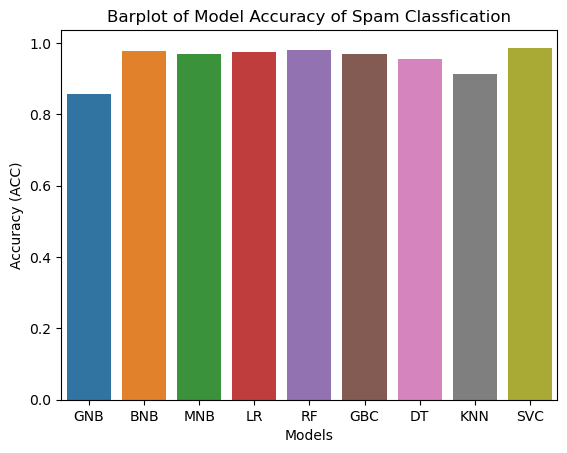

In [141]:
sns.barplot(x=final_df['Models'], y=final_df['ACC'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (ACC)')
plt.title('Barplot of Model Accuracy of Spam Classfication')

plt.show()

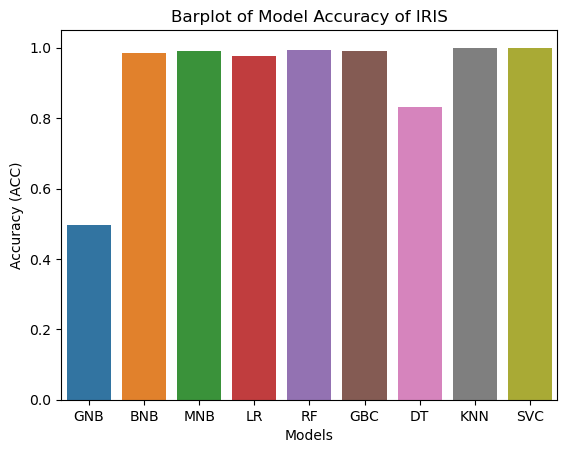

In [142]:
sns.barplot(x=final_df['Models'], y=final_df1['PCS'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (ACC)')
plt.title('Barplot of Model Accuracy of IRIS')

plt.show()

# Improving the Model

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

In [144]:
x = df['Message']
y = df['spam']

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [146]:
# Use TF-IDF vectorizer to convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [147]:
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

In [148]:
svm1= SVC()
svm1.fit(x_train_tfidf, y_train)

SVC()

In [149]:
# Save the trained model
joblib.dump(svm1, 'sms_spam_model_joblib')

['sms_spam_model_joblib']

In [150]:
# Load the trained model
model = joblib.load('sms_spam_model_joblib')

In [151]:
new_sms_data = ["Get a free iPhone now!", "Hi, how are you?"]


In [152]:
# Transform the new SMS data using the same TF-IDF vectorizer
new_sms_tfidf = tfidf_vectorizer.transform(new_sms_data)


In [153]:
# Make predictions
predictions = model.predict(new_sms_tfidf)


In [154]:
# Display the predictions
print(predictions)


[0 0]


# GUI

In [158]:
import tkinter as tk
from tkinter import Label, Button, StringVar, Text, messagebox
import joblib

# Load the trained model
loaded_model = joblib.load('sms_spam_model_joblib')

# Load the TF-IDF vectorizer
tfidf_vectorizer = joblib.load('tfidf_vectorizer.joblib')

# Create the GUI window
master = tk.Tk()
master.title("SMS Spam Classifier")
master.configure(bg='#ADD8E6')  # Set the background color (light blue)

def show_entry_fields():
    try:
        # Retrieve the text from the Text widget
        message_text = text_entry.get("1.0", "end-1c")

        # Transform the input text using the TF-IDF vectorizer
        message_tfidf = tfidf_vectorizer.transform([message_text])

        # Make a prediction
        result = loaded_model.predict(message_tfidf)

        # Mapping for predicted classes
        spam_mapping = {
            0: "Not Spam",
            1: "Spam"
        }

        predicted_spam = spam_mapping.get(result[0], "Unknown")

        prediction_text.set(f"Predicted Class: {predicted_spam}")
    except ValueError as e:
        print(f"Error: {e}")
        messagebox.showerror("Error", "Invalid input. Please enter a text message.")

# Create input fields and labels
Label(master, text="SMS Spam Classifier", bg='#ADD8E6', fg="black").grid(row=0, columnspan=4)

Label(master, text="Enter the Text", bg='#ADD8E6').grid(row=1, column=0)

# Create a Text widget for entering text
text_entry = Text(master, height=5, width=40, bg='#FFFFFF')  # White background
text_entry.grid(row=1, column=1, columnspan=3)

# Create the prediction button
Button(master, text='Predict', command=show_entry_fields, bg='#008080', fg='white').grid(row=5, columnspan=4)  # Dark teal background, white text

# Create a variable to display prediction result
prediction_text = StringVar()
Label(master, textvariable=prediction_text, bg='#ADD8E6').grid(row=6, columnspan=4)

# Start the GUI main loop
master.mainloop()
